##Problem 1: Getting Started with Data Exploration

###1. Data Exploration and Understanding

• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.


In [121]:
#importing the required libraries
import pandas as pd

#Dataset overview
print("Displaying the results of Dataset overview:\n")
#1.Loading the dataset
dataset= "/content/drive/MyDrive/Concept of AI/Assignment1/WHR-2024-5CS037.csv"
df=pd.read_csv(dataset)

#1. Displaying first 10 rows
print("1. First 10 rows of the dataset are as follow:\n")
print(df.head(10))

#2. identifying no. of rows and columns
(rows_count,columns_count)= df.shape
print(f"\n 2. The dataset has {rows_count} rows and {columns_count} columns.\n")

#3. List all the columns and their data types
print("3. Displaying the column names and their data types:\n")
print(df.dtypes)

Displaying the results of Dataset overview:

1. First 10 rows of the dataset are as follow:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                  


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.



In [122]:
#Basic Statistics
#1. Calculating mean, median, and standard deviation for the score
score_mean = df['score'].mean()
score_median = df['score'].median()
score_sd = df['score'].std()

print("\n4. Mean, Mediam and Standrad Deviation of the column 'score' is displayed as follow:\n")
print(f"Mean of Score: {score_mean:.3f}")
print(f"Median of Score: {score_median:.3f}")
print(f"Standard Deviation of Score: {score_sd:.3f}\n")

#2.Identifying the country with the highest and lowest happiness score
print("\n5. Displaying the countries with highest and lowest happiness score.\n")
high_score=df['score'].max()
happiest_country = df[df['score'] == high_score]['Country name'].values[0]
print(f"The country with the highest happiness score ({high_score}) is: {happiest_country}")

low_score=df['score'].min()
saddest_country = df[df['score'] == low_score]['Country name'].values[0]
print(f"The country with the lowest happiness score ({low_score}) is: {saddest_country}\n")


4. Mean, Mediam and Standrad Deviation of the column 'score' is displayed as follow:

Mean of Score: 5.528
Median of Score: 5.785
Standard Deviation of Score: 1.171


5. Displaying the countries with highest and lowest happiness score.

The country with the highest happiness score (7.741) is: Finland
The country with the lowest happiness score (1.721) is: Afghanistan



• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.



In [123]:
#Checking missing values
check_missing = df.isnull().sum()
print("\n6. Number of Missing values in each columns are listed as follow: ")
print(check_missing)


6. Number of Missing values in each columns are listed as follow: 
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.


In [124]:
#Filtering and Sorting
print("\n7. Displaying the countries after filtering and sorting :\n")

#filtering to show countries (name and score only) with the scores that are greater than 7.5
score_filtered_countries = df[df['score'] > 7.5]
print("Countries with a Score greater than 7.5 are mentioned as below:\n")
print(score_filtered_countries[['Country name', 'score']].head(10))#this is to display column of countries name along the scores

# Sort the filtered dataset by 'Log GDP per capita' in descending order
GDP_sort = score_filtered_countries.sort_values(by='Log GDP per capita', ascending=False)#now from the already filtered value sorting and filtering with respect to gdp

# Display the top 10 rows with only Country name and Log GDP per capita
print("\n Top 10 countries with Score > 7.5, sorted by Log GDP per capita in descending order:")
print(GDP_sort[['Country name', 'Log GDP per capita']].head(10))


7. Displaying the countries after filtering and sorting :

Countries with a Score greater than 7.5 are mentioned as below:

  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525

 Top 10 countries with Score > 7.5, sorted by Log GDP per capita in descending order:
  Country name  Log GDP per capita
1      Denmark               1.908
2      Iceland               1.881
0      Finland               1.844



• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [125]:
# Adding New Columns:
# Create 'Happiness Category' using a lambda function
df['Happiness Category'] = df['score'].apply(lambda x: 'Low' if x < 4 else ('Medium' if x <= 6 else 'High'))

print("\n8. Displaying dataset with the new 'Happiness Category' column:\n")
print(df[['Country name', 'score', 'Happiness Category']])


8. Displaying dataset with the new 'Happiness Category' column:

         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


###2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


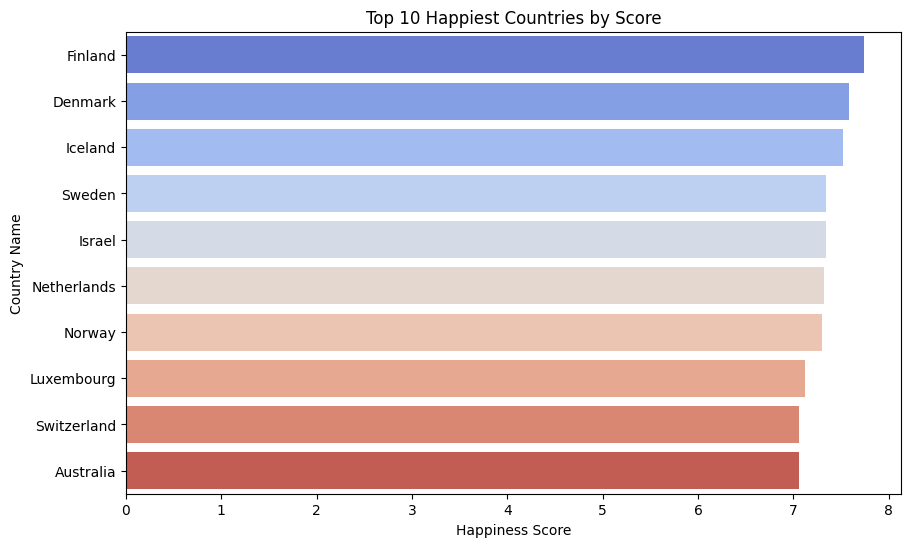

In [126]:
#importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Bar Plot
# Sorting by Score
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

# Bar plot for the top 10 happiest countries
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, hue='Country name', palette='coolwarm')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()


This bar plot highlights the happiness scores of the top 10 happiest countries, Finland being at the top of the list followed by Denmark, Iceland, Sweden, Israel, Netherlands, NorwaY, Luxembourg, Switzerland and Australia.


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.



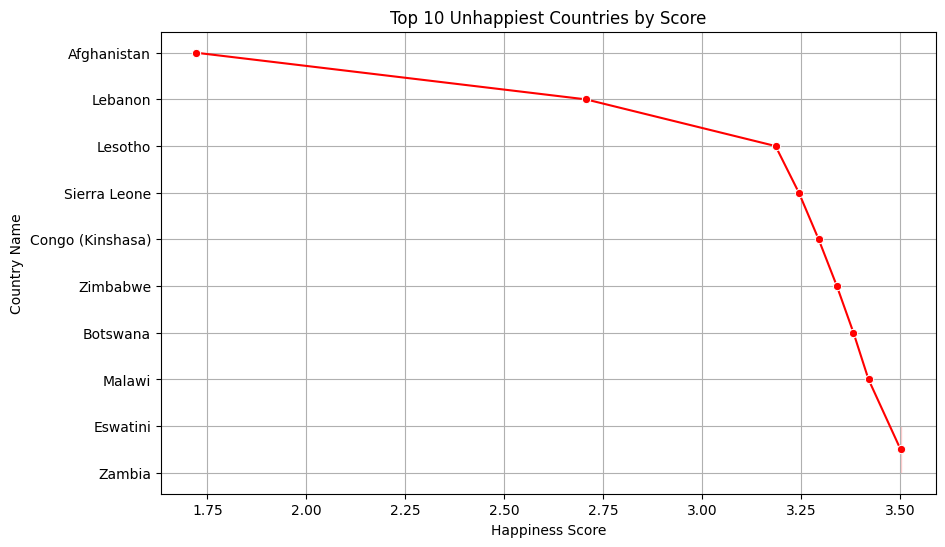

In [127]:
#Line Plot
# Sorting by Score in ascending order (bottom 10)
top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)

# Line plot for the top 10 unhappiest countries
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.grid(True)
plt.show()

This Line plot reveals the 10 least happy countries with Afghanistan at the bottom. The gradual increase in scores from Afghanistan to other countries shows that the progress exists but it is minimal.

• Plot a histogram for the Score column to show its distribution and also interpret.



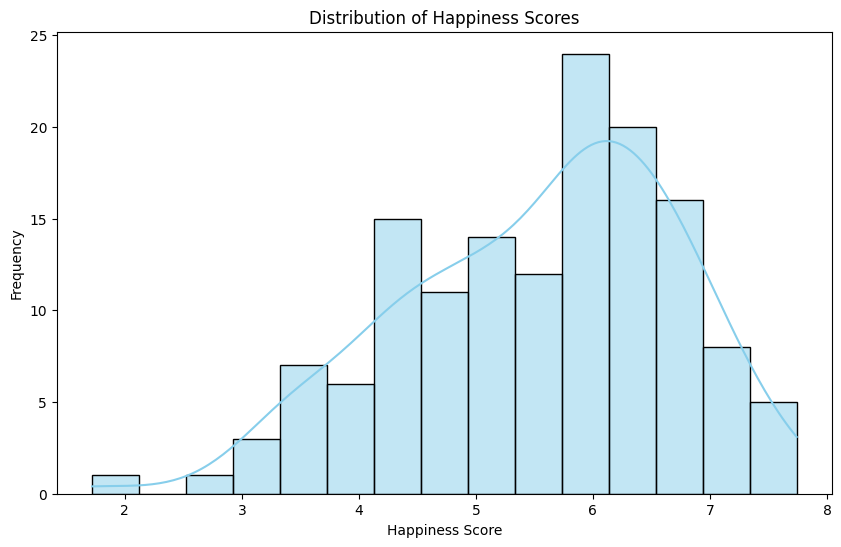

In [128]:
#Histogram
# Histogram for the Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the frequency distribution of happiness score globally. The distribution is not perfectly symmetrical, but rather shows that while many countries have average happiness levels, there is a notable gap between these and the very high scores, which are less frequent. From the plot we can see slightly right skewed distribution that indicates fewer countries acheiving exceptionally high happiness. Most countries have scores between 4 and 6, which indicates average happiness.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

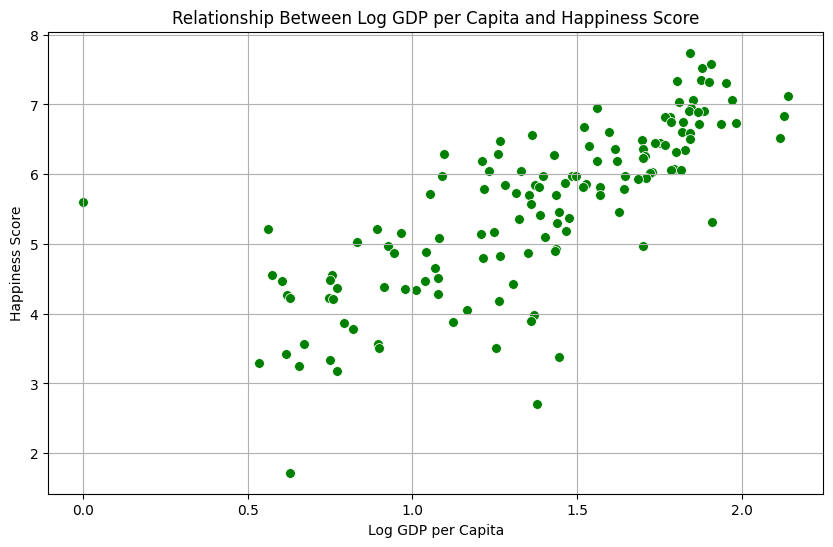

In [129]:
#Scatter Plot
# Scatter plot between Log GDP per Capita and Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='green', s=50)
plt.title('Relationship Between Log GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


The scatter plot explores the relationship between GDP per capita and happiness scores. Generally, countries with higher GDP are happier, but there are exceptions as we can see in the plot.

##Problem - 2 - Some Advance Data Exploration Task:

###Task - 1 - Setup Task - Preparing the South-Asia Dataset:

####Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.


In [130]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset
dataset= "/content/drive/MyDrive/Concept of AI/Assignment1/WHR-2024-5CS037.csv"
df=pd.read_csv(dataset)

#Task1 Setup Task
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan","India", "Maldives", "Nepal","Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
df['Country name'].isin(south_asian_countries)
print(south_asia_df)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi


###Task - 2 - Composite Score Ranking:
####Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.


South Asia DataFrame with Composite Score:
    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238

South Asian Countries Ranked by Composite Score:

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


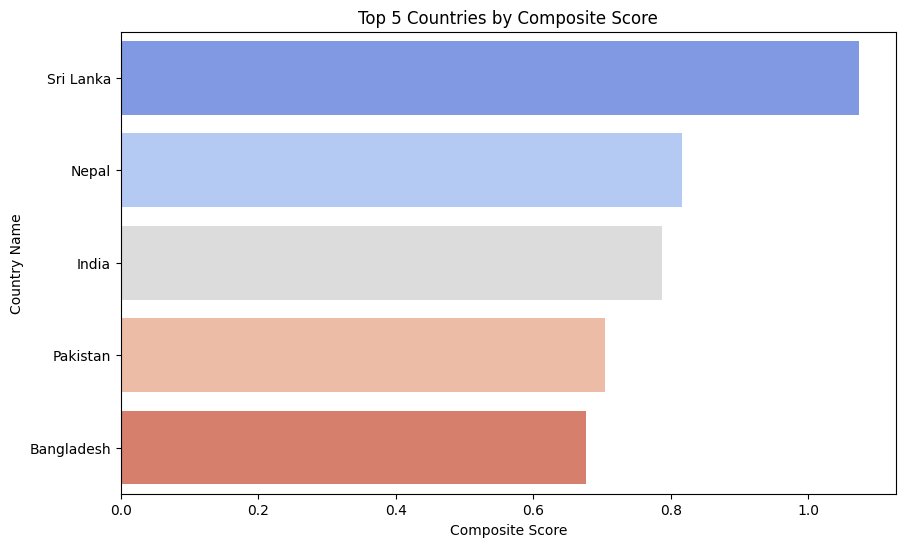

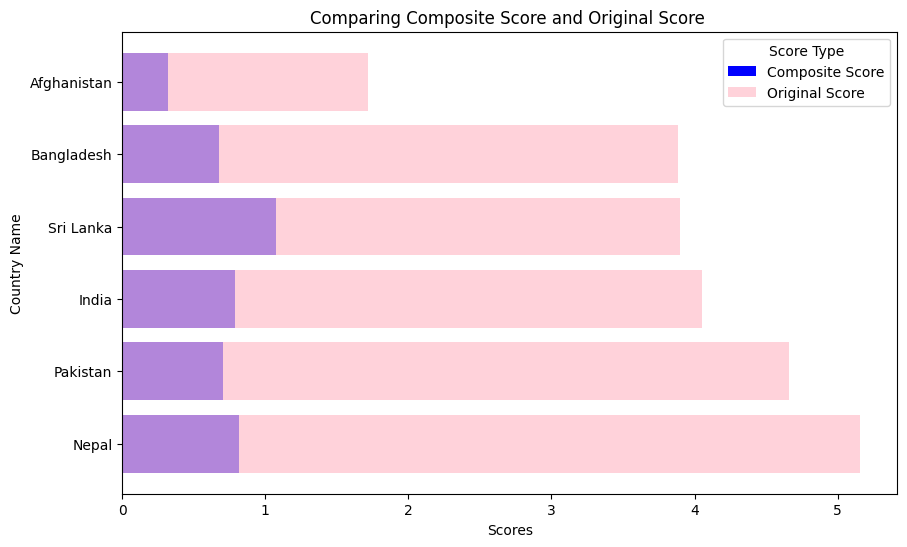

In [131]:
#Task2 - Composite Score Ranking
# Creating a copy to avoid SettingWithCopyWarning
south_asia_df = df[df['Country name'].isin(south_asian_countries)].copy()
# Creating the Composite Score column
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +0.30 * south_asia_df['Social support'] +0.30 * south_asia_df['Healthy life expectancy']
)

# Displaying the updated DataFrame
print("South Asia DataFrame with Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

#Ranking the South asian countries acording to the composite score in decending order
south_asia_rank_composite = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian Countries Ranked by Composite Score:\n")
print(south_asia_rank_composite[['Country name', 'Composite Score']])

#Composite Score Ranking
top_5_composite=south_asia_rank_composite.head(5)
# print("\n testing\n")
# print(top_5_composite)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite,hue='Country name', palette='coolwarm')
plt.title('Top 5 Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.show()

#Composite Score align with the original Score
comparing_scores_df=south_asia_df[['Country name', 'Composite Score','score']]
plt.figure(figsize=(10, 6))
plt.barh(comparing_scores_df['Country name'], comparing_scores_df['Composite Score'],color='blue', label='Composite Score')
plt.barh(comparing_scores_df['Country name'], comparing_scores_df['score'],color='pink',alpha=0.7, label='Original Score')

plt.title('Comparing Composite Score and Original Score ')
plt.xlabel('Scores')
plt.ylabel('Country Name')
plt.legend(title='Score Type')
plt.show()

This chart compares two types of scores for South Asian countries: the composite score and the happiness score.While the Composite Score and Original Score generally align but there are factors that may make it differ. For some countries, like Nepal, the happiness score is higher than the composite score, showing that cultural or emotional factors may boost happiness. For others, like Afghanistan, both scores are consistently low, reflecting severe challenges.



###Task - 3 - Outlier Detection:
####Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.


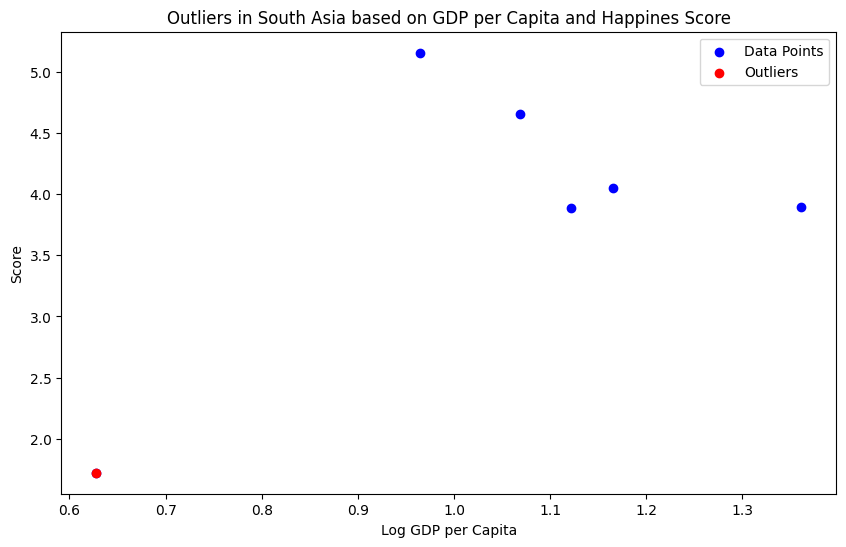

In [132]:
#Task 3- Outlier Detection
#Identifying outlier South Asia countries based on Score and GDP
#interquatrile for Score
FirstQuartile_score = south_asia_df['score'].quantile(0.25)
ThirdQuartile_score = south_asia_df['score'].quantile(0.75)
InterQuartile_score = ThirdQuartile_score - FirstQuartile_score

#interquartile for GDP
FirstQuartile_GDP = south_asia_df['Log GDP per capita'].quantile(0.25)
ThirdQuartile_GDP = south_asia_df['Log GDP per capita'].quantile(0.75)
InterQuartile_GDP = ThirdQuartile_GDP - FirstQuartile_GDP

lower_bound_score = FirstQuartile_score - 1.5 * InterQuartile_score
upper_bound_score = ThirdQuartile_score + 1.5 * InterQuartile_score

# Identifying outliers for GDP
lower_bound_gdp = FirstQuartile_GDP - 1.5 * InterQuartile_GDP
upper_bound_gdp = ThirdQuartile_GDP + 1.5 * InterQuartile_GDP

outliers_score = south_asia_df[(south_asia_df['score'] < lower_bound_score) | (south_asia_df['score'] > upper_bound_score)]
outliers_gdp = south_asia_df[(south_asia_df['Log GDP per capita'] < lower_bound_gdp) | (south_asia_df['Log GDP per capita'] > upper_bound_gdp)]

# Scatter plot for GDP vs Score with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Data Points')
plt.scatter(outliers_gdp['Log GDP per capita'], outliers_gdp['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outliers in South Asia based on GDP per Capita and Happines Score')
plt.legend()
plt.show()

The scatter plot compares GDP per Capita (x-axis) and Happiness Score (y-axis) for South Asian countries, with outliers highlighted in red. The outlier with both low GDP and low happiness will drag down the regional averages for both GDP and happiness scores . Most other South Asian countries are closer to the trend line, showing a  match between their wealth and happiness.This will highly affect on regional averages.


###Task - 4 - Exploring Trends Across Metrics:
####Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.


Pearson correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Pearson correlation between Score and Generosity: 0.874512371253192


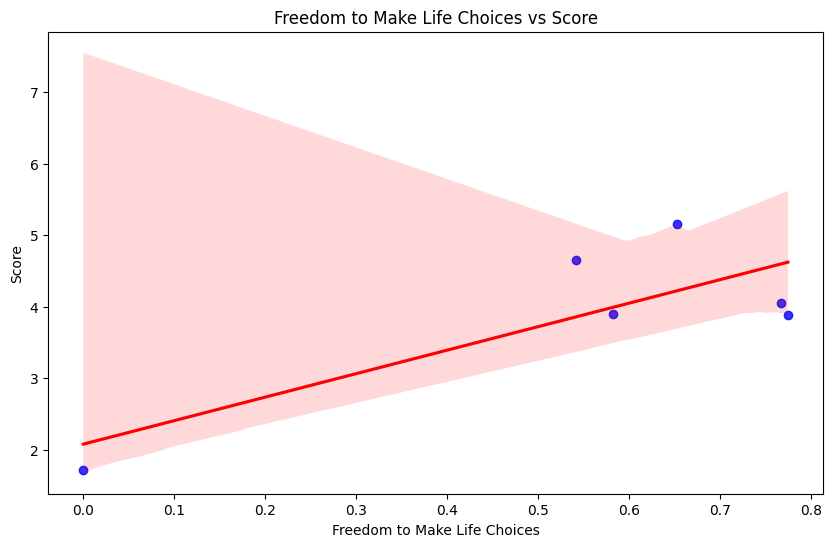

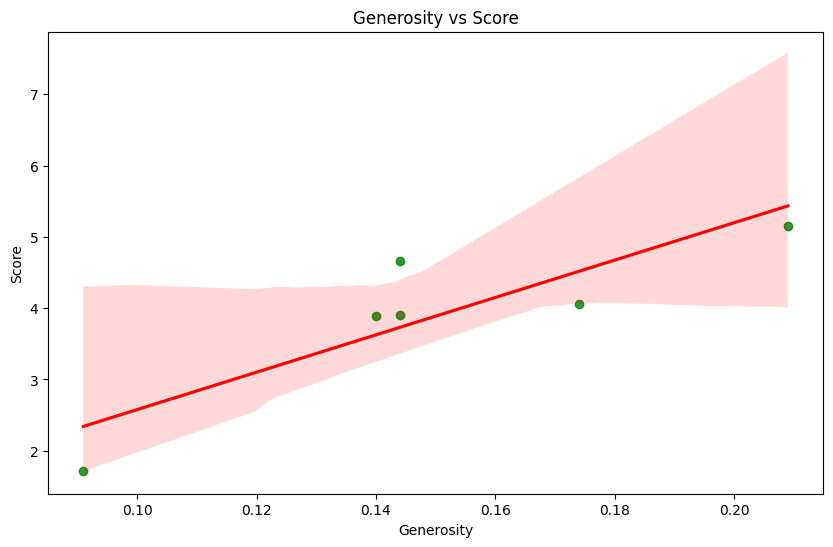

In [119]:
#task 4 - Exploring Trends Across Metrics:
# Calculating Pearson correlation between Score and the two chosen metrics
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"Pearson correlation between Score and Freedom to Make Life Choices: {correlation_freedom}")
print(f"Pearson correlation between Score and Generosity: {correlation_generosity}")

# Scatter plot with trendline for Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

# Scatter plot with trendline for Generosity vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

The scatter plots and correlation analysis show that both Freedom to Make Life Choices and Generosity are positively correlated with happiness scores, but Freedom to Make Life Choices has the strongest positive relationship with Happiness Scores in South Asia compared to generosity. It is seen that Freeedom to make choices is more influentional, while generosity also boosts happiness but not as much.


###Task - 5 - Gap Analysis:
####Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

    Country name  Log GDP per capita  score  GDP-Score Gap
92         Nepal               0.965  5.158         -4.193
107     Pakistan               1.069  4.657         -3.588
125        India               1.166  4.054         -2.888
127    Sri Lanka               1.361  3.898         -2.537
128   Bangladesh               1.122  3.886         -2.764
142  Afghanistan               0.628  1.721         -1.093
Countries ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193
Countries ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093


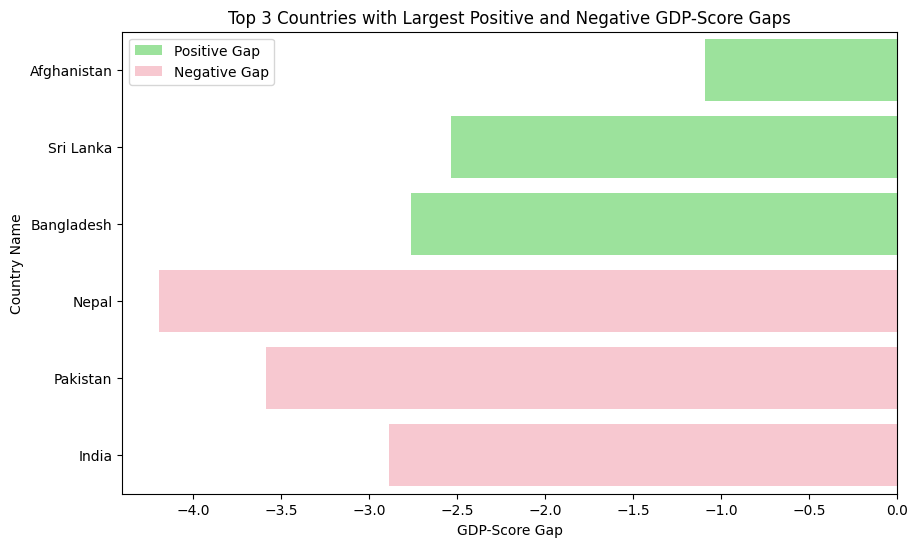

In [133]:
#Task 5  Gap Analysis:
#a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Displaying the DataFrame with the new column
print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

# Ranking countries based on GDP-Score Gap in descending order
gap_rank_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
print("Countries ranked by GDP-Score Gap (Descending):")
print(gap_rank_descending[['Country name', 'GDP-Score Gap']])

# Rank countries based on GDP-Score Gap in ascending order
gap_rank_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
print("Countries ranked by GDP-Score Gap (Ascending):")
print(gap_rank_ascending[['Country name', 'GDP-Score Gap']])

top_3_positive_gap = gap_rank_descending.head(3)
top_3_negative_gap = gap_rank_ascending.head(3)
# print("Top3 positive gap \n",top_3_positive_gap)
# print("Top3 negative gap \n",top_3_negative_gap)

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plot positive gaps
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap, color='lightgreen', label='Positive Gap')
# Plot negative gaps
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap, color='pink',label='Negative Gap')

plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.legend()
plt.show()


The bar chart shows the countries with the biggest gaps between GDP and happiness scores. Afghanistan has a positive gap, possibly because strong community ties make people happy despite low GDP. In contrast, countries like India, Pakistan, and Nepal have negative gaps, where economic growth doesn’t lead to happiness for everyone, due to inequality and lack of basic services. South Asian countries should focus on reducing inequality, improving access to services, and making sure people’s well-being improves along with economic growth.

## Problem - 3 - Comparative Analysis:
###Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

####Tasks:
   Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:

    middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine","Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

Complete the following task:



1. Descriptive Statistics:
  
  • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

  • Which region has higher happiness Scores on average?



In [ ]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Loading the dataset
dataset= "/content/drive/MyDrive/Concept of AI/Assignment1/WHR-2024-5CS037.csv"
df=pd.read_csv(dataset)

# List of Middle Eastern countries
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Create a DataFrame for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]
print(middle_east_df)

# Descriptive statistics for South Asia
south_asia_mean_score = south_asia_df['score'].mean()
south_asia_std_score = south_asia_df['score'].std()

# Descriptive statistics for Middle East
middle_east_mean_score = middle_east_df['score'].mean()
middle_east_std_score = middle_east_df['score'].std()

# Print the results
print(f"South Asia - Mean Score: {south_asia_mean_score}, Std Score: {south_asia_std_score}")
print(f"Middle East - Mean Score: {middle_east_mean_score}, Std Score: {middle_east_std_score}")


             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661                         0.827 

South Asia has a mean happiness score of 3.90 and a standard deviation of 1.18.
Middle East has a mean happiness score of 5.41 and a standard deviation of 1.57.

So, The Middle East has a higher average happiness score compared to South Asia.

2. Top and Bottom Performers:

  • Identify the top 3 and bottom 3 countries in each region based on the score.
  
  • Plot bar charts comparing these charts.



Top 3 South Asian Countries by Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
Bottom 3 South Asian Countries by Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Top 3 Middle Eastern Countries by Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Bottom 3 Middle Eastern Countries by Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


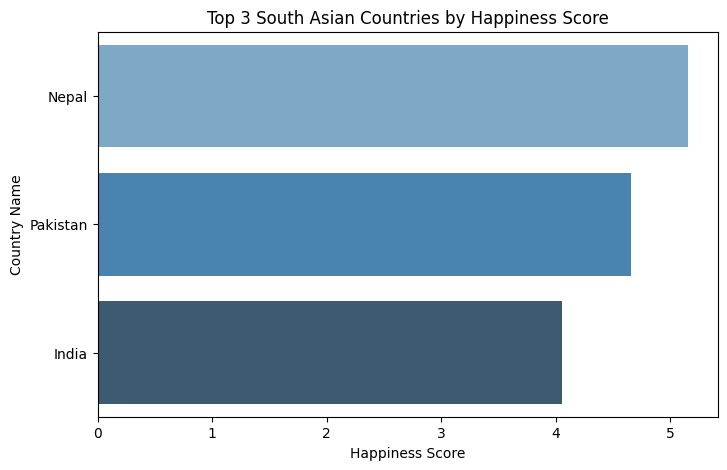

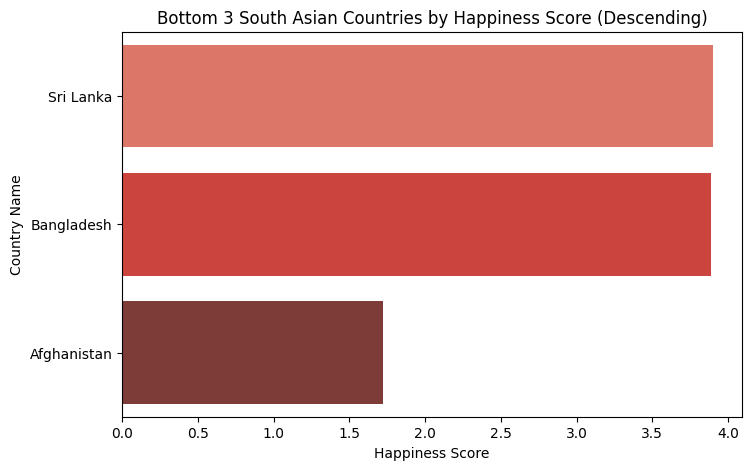

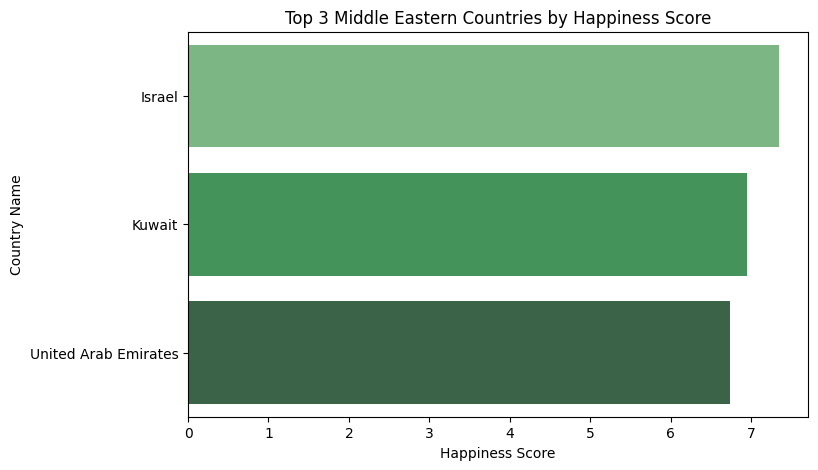

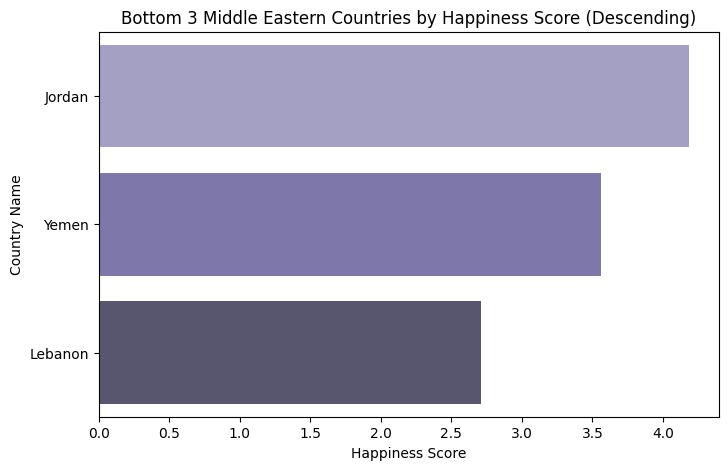

In [ ]:
# Top 3 countries by score in both regions
top_3_south_asia = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]

top_3_middle_east = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

# Display the results
print("Top 3 South Asian Countries by Score:")
print(top_3_south_asia)
print("Bottom 3 South Asian Countries by Score:")
print(bottom_3_south_asia)

print("Top 3 Middle Eastern Countries by Score:")
print(top_3_middle_east)
print("Bottom 3 Middle Eastern Countries by Score:")
print(bottom_3_middle_east)

# Visualization for Top 3 South Asian Countries
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='Country name', data=top_3_south_asia,hue='Country name', palette='Blues_d')
plt.title('Top 3 South Asian Countries by Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()

# Visualization for Bottom 3 South Asian Countries (Descending Order)
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='Country name', data=bottom_3_south_asia.sort_values(by='score', ascending=False),hue='Country name', palette='Reds_d')
plt.title('Bottom 3 South Asian Countries by Happiness Score (Descending)')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()

# Visualization for Top 3 Middle Eastern Countries
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='Country name', data=top_3_middle_east, hue='Country name',palette='Greens_d')
plt.title('Top 3 Middle Eastern Countries by Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()



# Visualization for Bottom 3 Middle Eastern Countries (Descending Order)
plt.figure(figsize=(8, 5))
sns.barplot(x='score', y='Country name', data=bottom_3_middle_east.sort_values(by='score', ascending=False),hue='Country name', palette='Purples_d')
plt.title('Bottom 3 Middle Eastern Countries by Happiness Score (Descending)')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()


3. Metric Comparisons:

  • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

  • Which metrics show the largest disparity between the two regions?



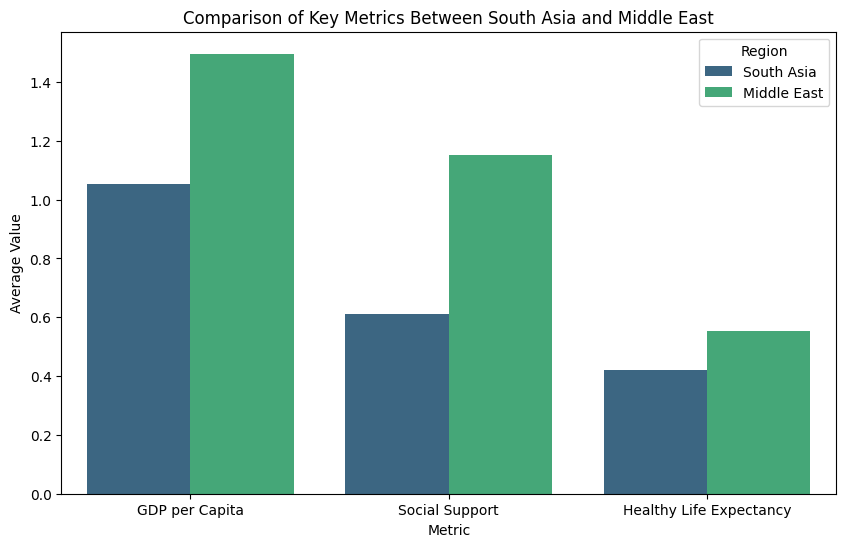

In [ ]:
#Metric Comparisons:
south_asia_metrics = south_asia_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_metrics = middle_east_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

metrics_comparison = pd.DataFrame({ 'Metric': ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy'],'South Asia': south_asia_metrics.values,'Middle East': middle_east_metrics.values})
melted_metrics = metrics_comparison.melt(id_vars='Metric', var_name='Region', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=melted_metrics, palette='viridis')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metric')
plt.show()

The grouped bar chart shows differences in GDP per Capita, Social Support, and Healthy Life Expectancy between South Asia and the Middle East. The biggest difference is in GDP per Capita, where the Middle East has much higher values than South Asia. While there are also some differences in Social Support and Healthy Life Expectancy, they are not as large as the gap in GDP per Capita. This shows that the Middle East has a stronger economy compared to South Asia, though both regions have some differences in social and health factors.

4. Happiness Disparity:

  • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

  • Which region has greater variability in happiness?



In [ ]:
#4. Happiness Disparity
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
south_asia_cv = (south_asia_std_score / south_asia_mean_score) * 100
middle_east_cv = (middle_east_std_score / middle_east_mean_score) * 100

print(f"South Asia: Range = {south_asia_range}, CV = {south_asia_cv}%")
print(f"Middle East: Range = {middle_east_range}, CV = {middle_east_cv}%")

South Asia: Range = 3.4370000000000003, CV = 30.21482883337427%
Middle East: Range = 4.634, CV = 28.938880812119404%


South Asia has a greater range and slightly higher coefficient of variation, indicating that the region has more variability in happiness compared to the Middle East.

5. Correlation Analysis:
  
  • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

  • Create scatter plots to visualize and interpret the relationships.



South Asia Correlation:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  
Middle East Correlation:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


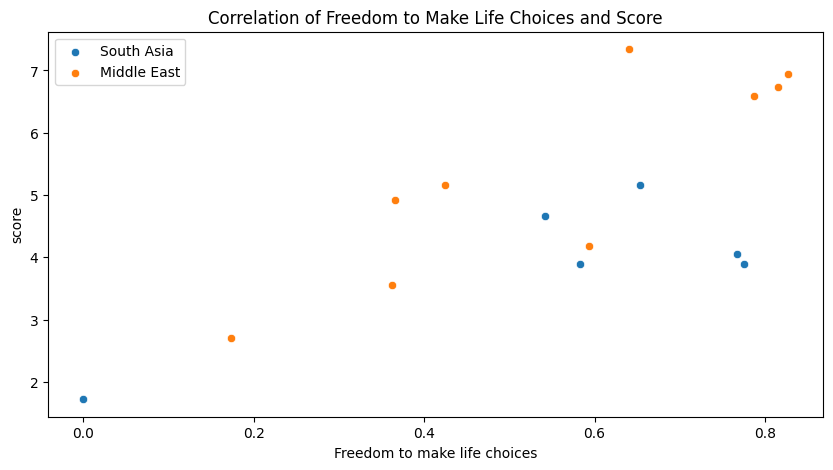

In [ ]:
#correlation of score with
south_asia_corr = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("South Asia Correlation:\n", south_asia_corr)
print("Middle East Correlation:\n", middle_east_corr)

#scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df, label='South Asia')
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df, label='Middle East')
plt.title('Correlation of Freedom to Make Life Choices and Score')
plt.legend()
plt.show()


In South Asia, happiness is strongly linked to freedom to make life choices and generosity, meaning people are happier when they have more freedom and are more generous. In the Middle East, happiness is also connected to freedom, but generosity has a weaker effect on happiness compared to South Asia. Both regions show that freedom is important for happiness, but generosity matters more in South Asia.

6. Outlier Detection:

  • Identify outlier countries in both regions based on Score and GDP per Capita.

  • Plot these outliers and discuss their implications.



South Asia Outliers:
     Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual  Composite Score  \
142                      0.088                0.672           0.3238   

     GDP-Score Gap  
142         -1.093  
Middle East Outliers:
 Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual]
Index: []


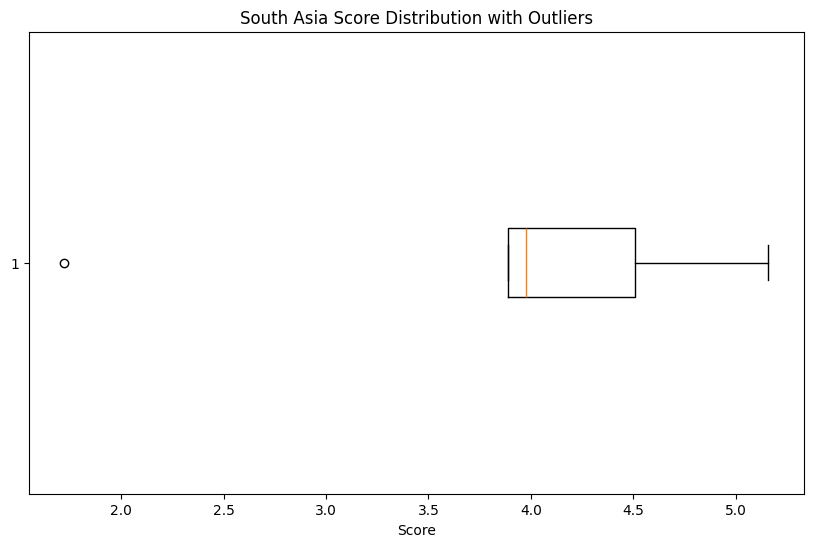

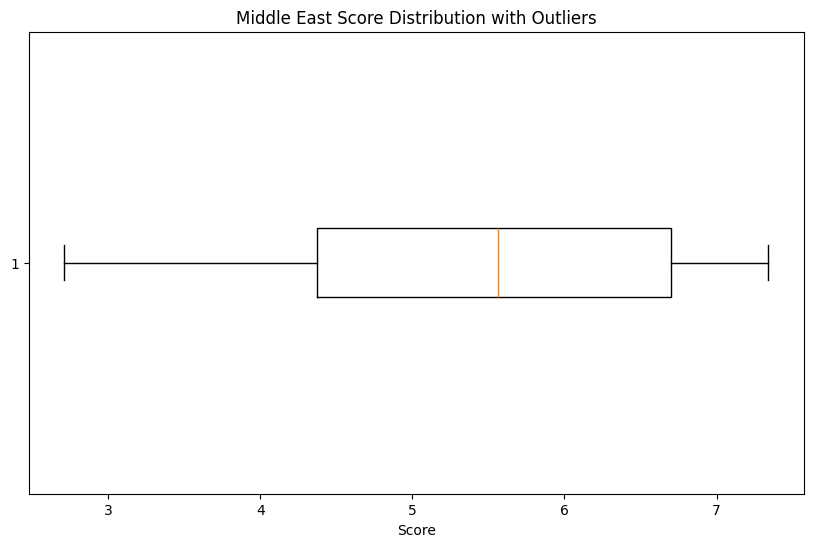

In [111]:
# south asia quartiles
Q1_south_asia = south_asia_df['score'].quantile(0.25)
Q3_south_asia = south_asia_df['score'].quantile(0.75)
IQR_south_asia = Q3_south_asia - Q1_south_asia

# quartile for middle east
Q1_middle_east = middle_east_df['score'].quantile(0.25)
Q3_middle_east = middle_east_df['score'].quantile(0.75)
IQR_middle_east = Q3_middle_east - Q1_middle_east

#upper and lower bounds for outlier detection
lower_bound_south_asia = Q1_south_asia - 1.5 * IQR_south_asia
upper_bound_south_asia = Q3_south_asia + 1.5 * IQR_south_asia

lower_bound_middle_east = Q1_middle_east - 1.5 * IQR_middle_east
upper_bound_middle_east = Q3_middle_east + 1.5 * IQR_middle_east

# Identifying outliers for South Asia
south_asia_outliers = south_asia_df[(south_asia_df['score'] < lower_bound_south_asia) | (south_asia_df['score'] > upper_bound_south_asia)]

# Identifying outliers for Middle East
middle_east_outliers = middle_east_df[(middle_east_df['score'] < lower_bound_middle_east) | (middle_east_df['score'] > upper_bound_middle_east)]

# Printing the outliers
print("South Asia Outliers:\n", south_asia_outliers)
print("Middle East Outliers:\n", middle_east_outliers)

import matplotlib.pyplot as plt

# Plot boxplot for South Asia
plt.figure(figsize=(10, 6))
plt.boxplot(south_asia_df['score'], vert=False)
plt.title('South Asia Score Distribution with Outliers')
plt.xlabel('Score')
plt.show()

# Plot boxplot for Middle East
plt.figure(figsize=(10, 6))
plt.boxplot(middle_east_df['score'], vert=False)
plt.title('Middle East Score Distribution with Outliers')
plt.xlabel('Score')
plt.show()



In South Asia, Afghanistan has a very low happiness score compared to other countries. This is due to low GDP, little social support, and less freedom. The Middle East has no countries with unusual scores. The boxplots show that South Asia has a wider range of happiness scores, with Afghanistan standing out, while the Middle East has more similar scores. This means South Asia has more differences in happiness, while the Middle East is more consistent.

7. Visualization:

  • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
  
  • Interpret the key differences in distribution shapes, medians, and outliers.

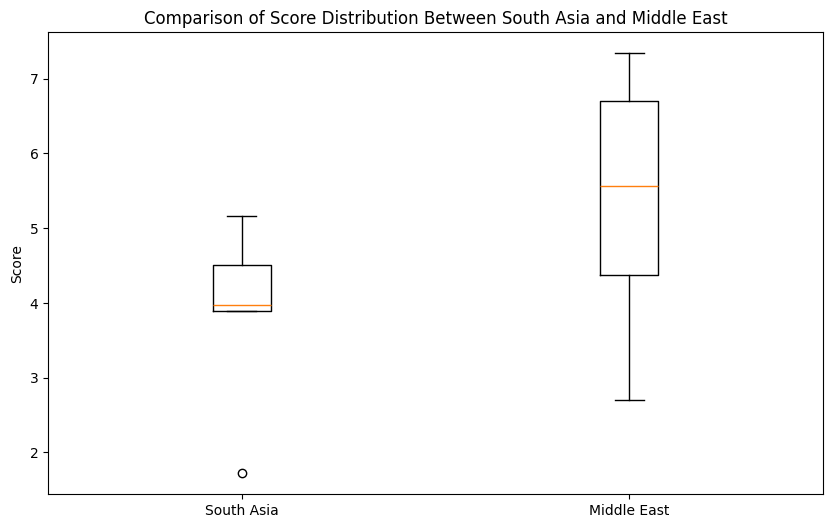

In [110]:
import matplotlib.pyplot as plt

# Combine data from both regions for comparison
south_asia_scores = south_asia_df['score']
middle_east_scores = middle_east_df['score']

# Create a boxplot for comparison
plt.figure(figsize=(10, 6))
plt.boxplot([south_asia_scores, middle_east_scores], labels=['South Asia', 'Middle East'])
plt.title('Comparison of Score Distribution Between South Asia and Middle East')
plt.ylabel('Score')
plt.show()


The boxplot comparing happiness scores between South Asia and the Middle East shows that South Asia has a wider range of scores with some very low outliers, like Afghanistan. The middle score (median) for South Asia is lower,  people in this region are generally less happy. The Middle East, however, has scores that are more consistent and closer together, with fewer extreme values. This means that happiness levels are more stable in the Middle East compared to South Asia.